# Bay Wheels Bike Sharing System

## Preliminary Wrangling

Bay Wheels (previously known as Ford GoBike) is a regional public bicycle sharing system in California's San Francisco Bay Area. They have different subscription plans where you can ride for just a single trip or have unlimited trips. They provide both classic and electric bikes for any type of rider, regardless of height, or riding ability. 

1. [Gather and Assess Data](#gather-data)
2. [Clean Data](#clean-data)
3. [Univariate Exploration](#univariate)
4. [Bivariate Exploration](#bivariate)
5. [Multivariate Exploration](#multivariate)
6. [Conclusion](#conclusion)

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

<a id="gather-data"></a>
### Gather and Assess Data
The aim of this project is to understand and learn insights of the consumer's behavior when using this system. Bay Wheels publicly share their data in the [Bay Wheels' Data System](#https://www.lyft.com/bikes/bay-wheels/system-data). For this project, we focus on the year 2019 which has 2,506,983 rows and 15 columns. Each trip (row) is anonymized and includes:

- Trip Duration (seconds)
- Start Time and Date
- End Time and Date
- Start Station ID
- Start Station Name
- Start Station Latitude
- Start Station Longitude
- End Station ID
- End Station Name
- End Station Latitude
- End Station Longitude
- Bike ID
- User Type (Subscriber or Customer – "Subscriber" = Member or "Customer" = Casual)
- Bike Share Trip for All (Users are recipients of certain financial assistance for low income groups- True or False)
- Rental Access Method (Users paid a ride using app or clipper - "App" = Lyft App or "Clipper" = Bay Area's all-in-one transit card (can pay for bike, trains, bus, etc.))

In [12]:
# Get top 5 rows
df = pd.read_csv('2019_baywheels.csv')
df.head()

C:\Users\Suva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
0,80825,2019-01-31 17:57:44.6130,2019-02-01 16:24:49.8640,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,No,NaN
1,65900,2019-01-31 20:58:33.8860,2019-02-01 15:16:54.1730,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,No,NaN
2,62633,2019-01-31 18:06:52.9240,2019-02-01 11:30:46.5300,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,No,NaN
3,44680,2019-01-31 19:46:09.7190,2019-02-01 08:10:50.3180,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,No,NaN
4,60709,2019-01-31 14:19:01.5410,2019-02-01 07:10:51.0650,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,No,NaN


In [3]:
# Get shape of dataframe
df.shape

(2506983, 15)

In [8]:
# Get data types
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
bike_share_for_all_trip     object
rental_access_method        object
dtype: object

Some columns have the wrong data type which needs to be corrected.

In [7]:
# Get null values
df.isnull().sum()

duration_sec                     0
start_time                       0
end_time                         0
start_station_id             80734
start_station_name           80133
start_station_latitude           0
start_station_longitude          0
end_station_id               82902
end_station_name             82350
end_station_latitude             0
end_station_longitude            0
bike_id                          0
user_type                        0
bike_share_for_all_trip     243259
rental_access_method       2386145
dtype: int64

Rental access method has the highest null values.

In [9]:
# Describe numerical columns
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,2.506983e+06,2.426249e+06,2.506983e+06,2.506983e+06,2.424081e+06,2.506983e+06,2.506983e+06,2.506983e+06
mean,8.076483e+02,1.465047e+02,3.776506e+01,-1.223499e+02,1.427044e+02,3.776422e+01,-1.223459e+02,2.789833e+04
std,1.974714e+03,1.223171e+02,1.363698e-01,3.089648e-01,1.214296e+02,2.392885e-01,7.080417e-01,1.146067e+05
min,6.000000e+01,3.000000e+00,0.000000e+00,-1.225143e+02,3.000000e+00,0.000000e+00,-1.225143e+02,4.000000e+00
25%,3.590000e+02,4.700000e+01,3.776931e+01,-1.224130e+02,4.300000e+01,3.777003e+01,-1.224117e+02,1.952000e+03
50%,5.710000e+02,1.050000e+02,3.778053e+01,-1.223983e+02,1.010000e+02,3.778076e+01,-1.223981e+02,4.420000e+03
75%,8.870000e+02,2.430000e+02,3.779539e+01,-1.222914e+02,2.390000e+02,3.779587e+01,-1.222934e+02,9.682000e+03
max,9.121100e+05,4.980000e+02,4.551000e+01,0.000000e+00,4.980000e+02,4.551000e+01,0.000000e+00,9.999410e+05


Th lowest duration was 60 seconds. 

In [32]:
# Check if there are duplicates
df.duplicated().sum()

0

In [33]:
# Check column bike_share_for_all_trip
df.bike_share_for_all_trip.value_counts()

No     2086152
Yes     177572
Name: bike_share_for_all_trip, dtype: int64

In [34]:
# Check null values and sort by start_time
df[df.bike_share_for_all_trip.isna()].sort_values(by=['start_time'])

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
1244296,1060,2019-06-10 11:13:10,2019-06-10 11:30:50,NaN,NaN,37.343699,-121.914881,NaN,NaN,37.343669,-121.914823,678749,Subscriber,NaN,app
1244287,138,2019-06-10 12:25:26,2019-06-10 12:27:44,NaN,NaN,37.343662,-121.914887,NaN,NaN,37.343697,-121.914921,678749,Subscriber,NaN,app
1244299,61,2019-06-10 12:48:40,2019-06-10 12:49:42,NaN,NaN,37.343713,-121.914905,NaN,NaN,37.343720,-121.914910,678749,Subscriber,NaN,app
1244293,195,2019-06-10 13:05:29,2019-06-10 13:08:44,NaN,NaN,37.343681,-121.914960,NaN,NaN,37.343677,-121.914877,678749,Subscriber,NaN,app
1244291,602,2019-06-10 13:22:10,2019-06-10 13:32:12,NaN,NaN,37.343681,-121.914913,422.0,Stockton Ave at Lenzen Ave,37.336775,-121.909149,678749,Subscriber,NaN,app
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2356907,782,2019-12-31 23:56:34.4620,2020-01-01 00:09:36.7050,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,11683,Customer,NaN,NaN
2356906,781,2019-12-31 23:56:40.3240,2020-01-01 00:09:41.5450,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,11020,Customer,NaN,NaN
2356911,185,2019-12-31 23:57:01.5510,2020-01-01 00:00:07.4940,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,75.0,Market St at Franklin St,37.773793,-122.421239,12734,Customer,NaN,NaN
2356904,1050,2019-12-31 23:59:37.2060,2020-01-01 00:17:08.1880,473.0,Willow St at Blewett Ave,37.309014,-121.900011,294.0,Pierce Ave at Market St,37.327581,-121.884559,11448,Customer,NaN,NaN


Interestingly, the null values occur starting June onwards. A quick check reveals that Lyft acquired the old FordGo system and rebranded it as Bay Wheels (https://www.sfchronicle.com/business/article/Lyft-renames-bike-rentals-as-Bay-Wheels-13966479.php). This bike share for all benefit was part of the rebranding. For now, we will not use this column for analysis.   

In [35]:
# Check column rental access method
df.rental_access_method.value_counts()

app        108010
clipper     12828
Name: rental_access_method, dtype: int64

In [36]:
# Get null percentage
df.rental_access_method.isna().sum() / df.shape[0] *100

95.179943382145

Previously, we know that rental access method has the highest null values. Looks like 95.18% of the columns is null. For now, we will drop this column.

In [40]:
# Check the station id name column
# Which month has the highest nulls

df_copy = df.copy()
df_copy['start_time'] = pd.to_datetime(df_copy['start_time'])
df_copy.index = df_copy.start_time
df_copy[df_copy['start_station_id'].isnull()].resample('M')['start_station_latitude'].count()

start_time
2019-01-31      248
2019-02-28      197
2019-03-31      221
2019-04-30       64
2019-05-31       15
2019-06-30     2160
2019-07-31    55887
2019-08-31        0
2019-09-30        0
2019-10-31        0
2019-11-30      923
2019-12-31    21019
Freq: M, Name: start_station_latitude, dtype: int64

In [41]:
df_copy.resample('M')['start_station_longitude'].count()

start_time
2019-01-31    192082
2019-02-28    183412
2019-03-31    256299
2019-04-30    239111
2019-05-31    182163
2019-06-30    191772
2019-07-31    258102
2019-08-31    210563
2019-09-30    217986
2019-10-31    239895
2019-11-30    185496
2019-12-31    150102
Freq: M, Name: start_station_longitude, dtype: int64

In [46]:
df_copy[df_copy['start_station_id'].isnull()].resample('M')['bike_id'].count()

start_time
2019-01-31      248
2019-02-28      197
2019-03-31      221
2019-04-30       64
2019-05-31       15
2019-06-30     2160
2019-07-31    55887
2019-08-31        0
2019-09-30        0
2019-10-31        0
2019-11-30      923
2019-12-31    21019
Freq: M, Name: bike_id, dtype: int64

Most null station_id are from July and December. A quick reveals that in July 2019, ebikes were introduced but was quickly pulled out due to batteries issue. It was later reintroduced back in December 2019. (https://www.sfexaminer.com/news/lyft-set-to-return-e-bike-to-sf-streets-after-solving-battery-fire-issue/). We are not sure what is the cause of null values for other months so for now we will leave them as it is.

Below are the issues that needs cleaning.

**Quality**
1. Incorrect data types (start_time, end_time, start_station_id, end_station_id, user_type)
2. Missing values in bike_share_for_all_trip and rental_access_method 


<a id="clean-data"></a>
### Clean Data

In [49]:
# Save a copy of the original dataframe
df_clean = df.copy()

**1. Incorrect data types**

**a) Convert start_time and end_time to datetime format**

**Code**

In [50]:
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])
df_clean['end_time'] = pd.to_datetime(df_clean['end_time'])


**Test**

In [53]:
df_clean.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 15 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   duration_sec             2506983 non-null  int64         
 1   start_time               2506983 non-null  datetime64[ns]
 2   end_time                 2506983 non-null  datetime64[ns]
 3   start_station_id         2506983 non-null  object        
 4   start_station_name       2426850 non-null  object        
 5   start_station_latitude   2506983 non-null  float64       
 6   start_station_longitude  2506983 non-null  float64       
 7   end_station_id           2506983 non-null  object        
 8   end_station_name         2424633 non-null  object        
 9   end_station_latitude     2506983 non-null  float64       
 10  end_station_longitude    2506983 non-null  float64       
 11  bike_id                  2506983 non-null  int64         
 12  

**b) Convert start_station_id and end_station_id to string**

**Code**

In [52]:
df_clean['start_station_id'] = df_clean['start_station_id'].astype(str)
df_clean['end_station_id'] = df_clean['end_station_id'].astype(str)

# Remove .0 at the end 
df_clean['start_station_id'] = df_clean['start_station_id'].apply(lambda x : x.split('.')[0])
df_clean['end_station_id'] = df_clean['end_station_id'].apply(lambda x : x.split('.')[0])


**Test**

In [54]:
df_clean.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
0,80825,2019-01-31 17:57:44.613,2019-02-01 16:24:49.864,229,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,No,NaN
1,65900,2019-01-31 20:58:33.886,2019-02-01 15:16:54.173,4,Cyril Magnin St at Ellis St,37.785881,-122.408915,134,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,No,NaN


**Convert user_type to category**

**Code**

In [55]:
df_clean['user_type'] = df_clean['user_type'].astype('category')

**Test**

In [56]:
df_clean.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 15 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   duration_sec             2506983 non-null  int64         
 1   start_time               2506983 non-null  datetime64[ns]
 2   end_time                 2506983 non-null  datetime64[ns]
 3   start_station_id         2506983 non-null  object        
 4   start_station_name       2426850 non-null  object        
 5   start_station_latitude   2506983 non-null  float64       
 6   start_station_longitude  2506983 non-null  float64       
 7   end_station_id           2506983 non-null  object        
 8   end_station_name         2424633 non-null  object        
 9   end_station_latitude     2506983 non-null  float64       
 10  end_station_longitude    2506983 non-null  float64       
 11  bike_id                  2506983 non-null  int64         
 12  

**2. Drop columns bike_share_for_all_trip and rental_access_method as they are incomplete.**

**Code**

In [57]:
df_clean.drop(['bike_share_for_all_trip', 'rental_access_method'], axis=1, inplace=True)

**Test**

In [58]:
df_clean.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id',
       'user_type'],
      dtype='object')

In [59]:
# Save cleaned data
df_clean.to_csv('master_2019_baywheels.csv', index=False)

### What is the structure of your dataset?
> There are 2,506,982 rows and 13 columns.

### What is/are the main feature(s) of interest in your dataset?
> The main interest is to understand the consumer's ride behavior. For example: Which days have the most ride, average duration of rides, and if there are different behavior between subscriber or customers.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
> Features that will be most helpful are user_type, duration_sec, start_time, end_time.

<a id="univariate"></a>
### Univariate Exploration
> In this section, we will investigate distributions of individual variables.

#### 1. What are the number of rentals for each user type?

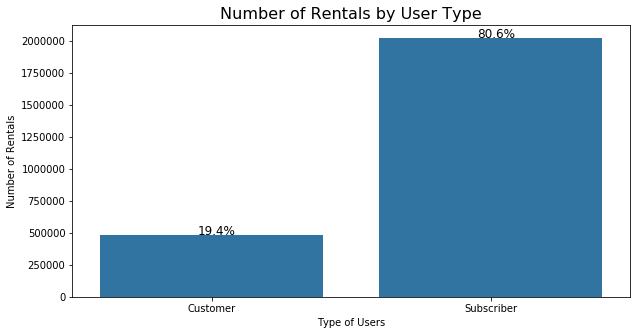

In [11]:
base_color = sb.color_palette()[0]
plt.figure(figsize=(10,5))
ax = sb.countplot(x='user_type', data=df_clean, color=base_color)
plt.xlabel('Type of Users')
plt.ylabel('Number of Rentals')
plt.title('Number of Rentals by User Type', fontsize=16)

# Display percentage
total = len(df_clean['user_type'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size = 12);

Most rides are from subscribers. 

#### 2. What is the monthly distribution for the number of rentals?

In [12]:
# First, extract all info from the time column
df_clean['month'] = df_clean['start_time'].dt.strftime("%b")
df_clean['hour'] = df_clean['start_time'].dt.hour
df_clean['day'] = df_clean['start_time'].dt.day_name()

# Order the weekday columns
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
day_ord = pd.api.types.CategoricalDtype(ordered = True, categories = days)
df_clean['day'] = df_clean['day'].astype(day_ord)

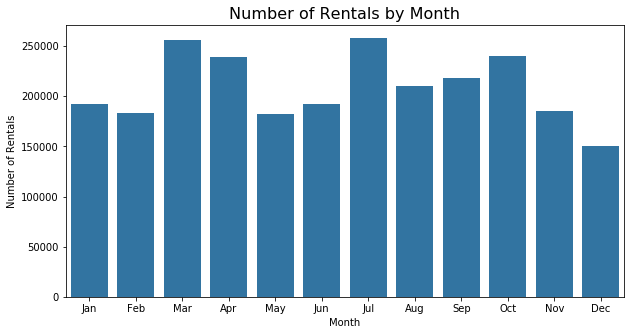

In [5]:
plt.figure(figsize=(10,5))
sb.countplot(x='month', data=df_clean, color=base_color)
plt.xlabel('Month')
plt.ylabel('Number of Rentals')
plt.title('Number of Rentals by Month', fontsize=16);

There are low number of rentals between Jan-Feb, May-June and Nov-Dec. Low rental in Nov-Dec is expected as it is winter time. As for May-June, it could be due to the rebranding done during June 2019. There was a high increase from June to July which could be due to the introduction of dockless ebike. However, the ebikes were quickly pulled out due to batteries issue which caused a drop in rental in August.

#### 3. Is the number of rentals higher during the weekends or the weekdays?

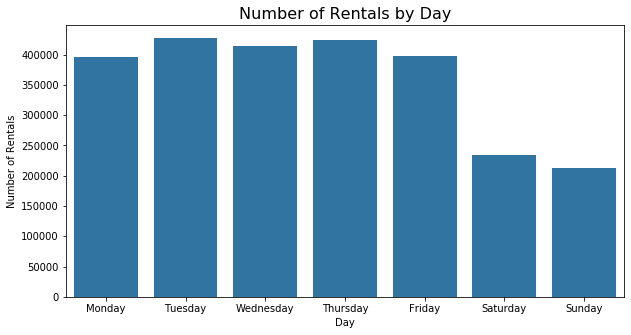

In [6]:
plt.figure(figsize=(10,5))
sb.countplot(x='day', data=df_clean, color=base_color)
plt.xlabel('Day')
plt.ylabel('Number of Rentals')
plt.title('Number of Rentals by Day', fontsize=16);

Weekdays have a higher number of rentals than weekends. Most probably, the bikes are used to commute to office.

#### 4. Which hour has the highest rental?

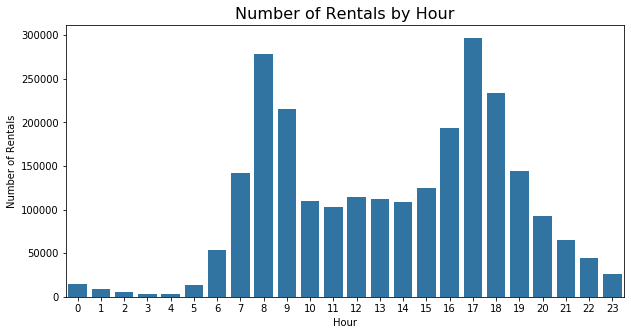

In [7]:
plt.figure(figsize=(10,5))
sb.countplot(x='hour', data=df_clean, color=base_color)
plt.xlabel('Hour')
plt.ylabel('Number of Rentals')
plt.title('Number of Rentals by Hour', fontsize=16);

Highest rental was during 8-9am and 5-6pm. This may be due to the fact that the bikes are being used to go to their office and to return after working hours. 

#### 5. What is the average duration of rides?

In [13]:
# Let's convert seconds to minute for duration
df_clean['duration_min'] = df_clean['duration_sec']/60


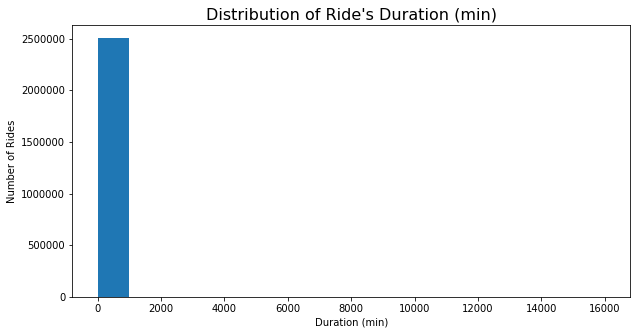

In [9]:
# Plot histogram
plt.figure(figsize=(10,5))
bin_edges = np.arange(1, df_clean['duration_min'].max()+1000, 1000)
plt.hist(data=df_clean, x='duration_min', bins=bin_edges)
plt.xlabel('Duration (min)')
plt.ylabel('Number of Rides')
plt.title('Distribution of Ride\'s Duration (min)', fontsize=16);

In [50]:
df_clean.query('duration_min > 1440')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,month,hour,day,duration_min
2481276,912110,2019-12-19 23:15:36,2019-12-30 12:37:26,nan,NaN,37.323757,-121.878614,nan,NaN,37.327656,-121.868598,614329,Customer,Dec,23,Thursday,15201.833333


The histogram is right skewed and it also contains a record where the ride was more than 24 hours. This could be an error and we shall delete this record. To better see the distribution, the duration_min should be log scaled.

In [14]:
df_clean = df_clean.query('duration_min <= 1440')


In [54]:
# Check log value of duration_min to set bin edges
np.log10(df_clean['duration_min'].describe())

count    6.399151
mean     1.128876
std      1.498075
min      0.000000
25%      0.776943
50%      0.978485
75%      1.169772
max      3.157507
Name: duration_min, dtype: float64

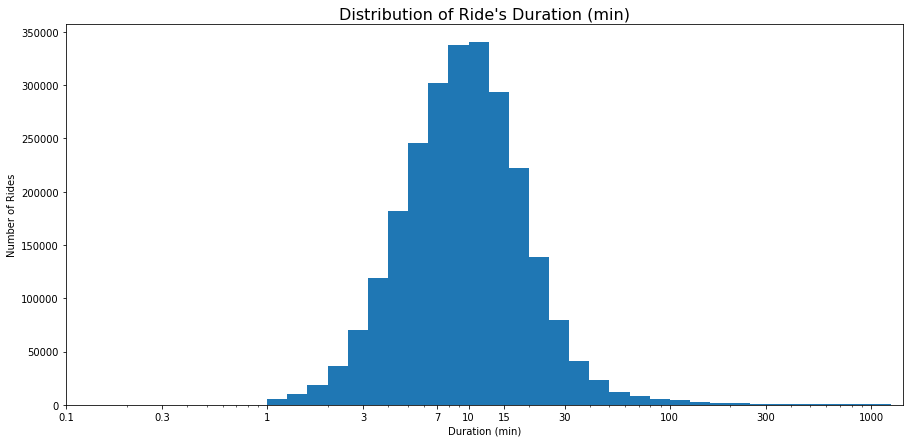

In [11]:
# Plot log scaled histogram
plt.figure(figsize=(15,7))
bin_edges = 10 ** np.arange(0, 3.16+0.1,0.1)
plt.hist(data = df_clean, x = 'duration_min', bins = bin_edges)
plt.xscale('log')
plt.xlim(0.1, 1440)
ticks = [0.1,0.3,1,3,7,10,15,30,100,300,1000]
labels = ['{}'.format(v) for v in ticks]
plt.xticks(ticks, labels)

plt.xlabel('Duration (min)')
plt.ylabel('Number of Rides')
plt.title('Distribution of Ride\'s Duration (min)', fontsize=16);

It is a unimodal graph. Most rides was between 5-20 minutes. There are rides that last more than 100 minutes up to 1000 minutes. Let's group the duration and count the rides. (Ref: https://github.com/Dani-Al-Fdez/Communicate-Data-Findings-Bay-Wheels-Udacity-DAND-project-/blob/master/Fordgo_Exploration.ipynb)
- Less than 15 minutes
- 15-30 minutes
- Greater than 30 minutes

In [15]:
# Group duration into set limit
bin_names = ['< 15 min', '15 to 30 min', '> 30 min']
bin_edges = [0, 15, 30, df_clean['duration_min'].max()]
df_clean['duration_period'] = pd.cut(df_clean['duration_min'], bin_edges, labels=bin_names)
df_clean['duration_period'].sample(5)

360497     < 15 min
2260732    < 15 min
747731     < 15 min
208975     < 15 min
1924705    > 30 min
Name: duration_period, dtype: category
Categories (3, object): [< 15 min < 15 to 30 min < > 30 min]

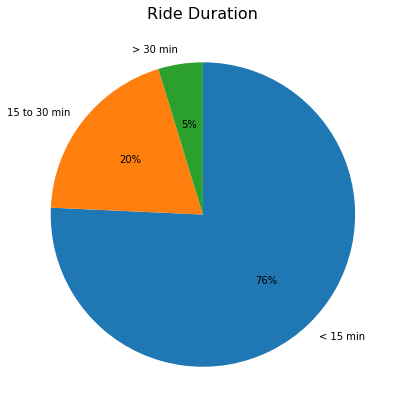

In [14]:
# Create pie chart
plt.figure(figsize=(15,7)).tight_layout(pad=10.0)
sorted_counts = df_clean['duration_period'].value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, autopct='%1.0f%%')

plt.title('Ride Duration', fontsize=16);


76% of rides are less than 15 minutes, 20% are between 15-30 minutes and only 5% are more than 30 minutes.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
> Majority of users are subscribers. Bikes are mostly used during 8-9am and 5-6pm and more on weekdays than on weekends. This could mean that the bikes are being used to go and return from their work place. About 76% of the rides are less than 15 minutes. Due to the high percentage, the duration histogram was highly right skewed. Thus, a log transformation was done to get a  better visualization on the ride's duration distribution. There was an unusual record of a bike being rented for more than 24 hours. This record was considered an outlier and removed. 

<a id="bivariate"></a>
### Bivariate Exploration
> In this section, we will investigate the relationships between pairs of variables.

#### 1. What is the average duration of rides for each month?

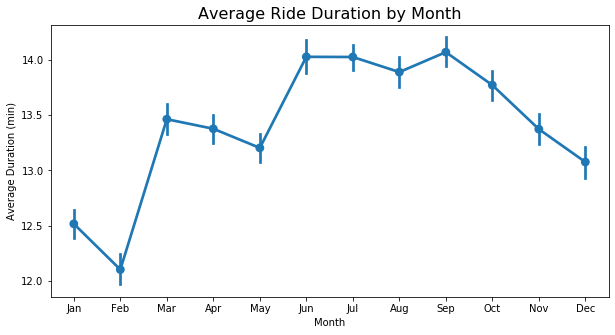

In [16]:
plt.figure(figsize=(10,5))
sb.pointplot(data=df_clean, x='month', y='duration_min', color=base_color, linestyles='-')
plt.xlabel('Month')
plt.ylabel('Average Duration (min)')
plt.title('Average Ride Duration by Month', fontsize=16);

San Franscico has 4 seasons. (Ref: https://seasonsyear.com/USA/California/San-Francisco)
- Spring : March-May (Temperature = 14 to 18°C)
- Summer : June-August (Temperature = 20°C, lots of fair and festival)
- Autumn: September - November (Temperature = 18 to 23°C, low probabilty of precipitation and fog) 
- Winter : December - February (Temperature = 11 and 14°C)

Based on the graph, average duration of rides are highest during June-September which is are the summer month. It begins to drop during the colder months. 

#### 2. Does the ride duration differ by day?

In [16]:
# Limit to rides less than 45 minutes as they are the majority
df_duration_45mins = df_clean.query('duration_min <= 45')

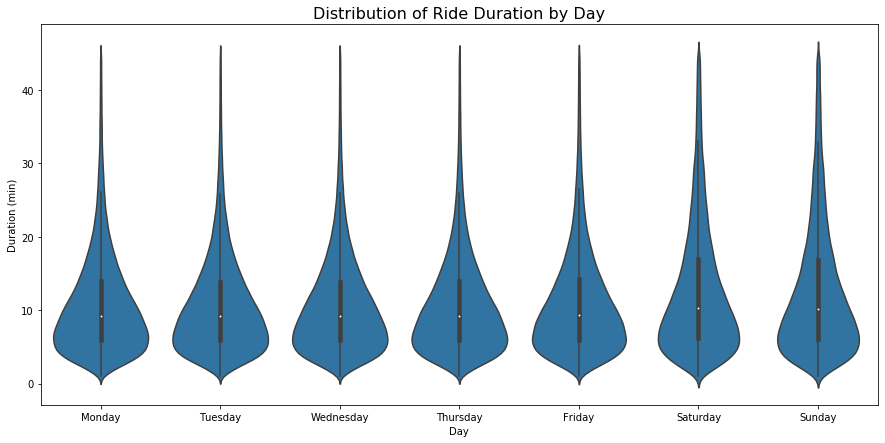

In [88]:
plt.figure(figsize=(15,7))
sb.violinplot(data=df_duration_45mins, x='day', y='duration_min', color=base_color)
plt.xlabel('Day')
plt.ylabel('Duration (min)')
plt.title('Distribution of Ride Duration by Day', fontsize=16);

Monday-Friday has a higher density of rides less than 10 minutes compared to weekends. Weekends, however, tend to have a longer ride duration compared to weekdays as the density plot is thicker for rides greater than 20 minutes than for weekdays.

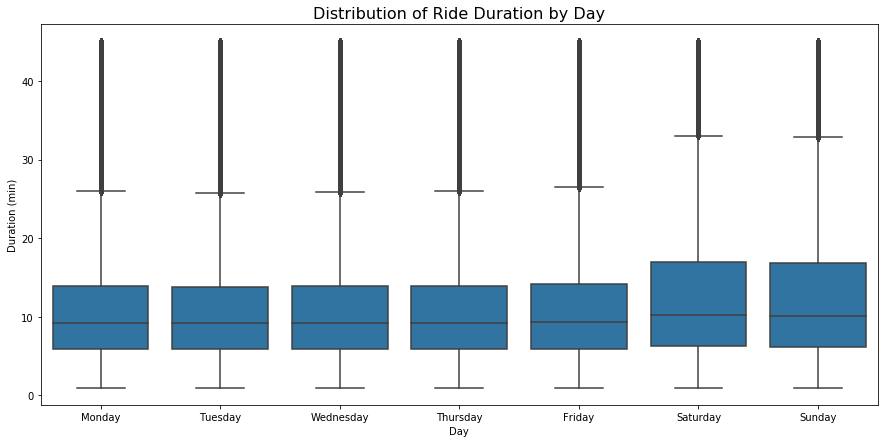

In [87]:
plt.figure(figsize=(15,7))
sb.boxplot(data=df_duration_45mins, x='day', y='duration_min', color=base_color)
plt.xlabel('Day')
plt.ylabel('Duration (min)')
plt.title('Distribution of Ride Duration by Day', fontsize=16);

The median for weekends ride duration is higher compared to weekdays. This proves that the ride duration is dependent on whether it is a weekend or a weekday.

#### 3. Does customer and subscriber have different ride duration?

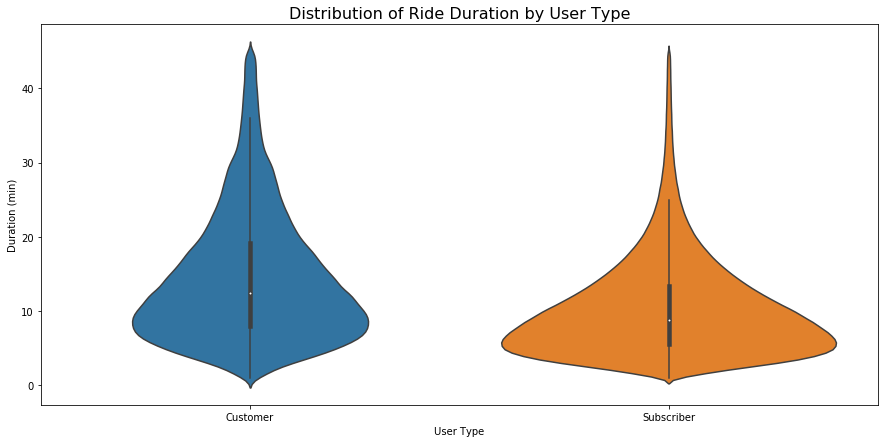

In [95]:
plt.figure(figsize=(15,7))
sb.violinplot(data=df_duration_45mins, x='user_type', y='duration_min')
plt.xlabel('User Type')
plt.ylabel('Duration (min)')
plt.title('Distribution of Ride Duration by User Type', fontsize=16);

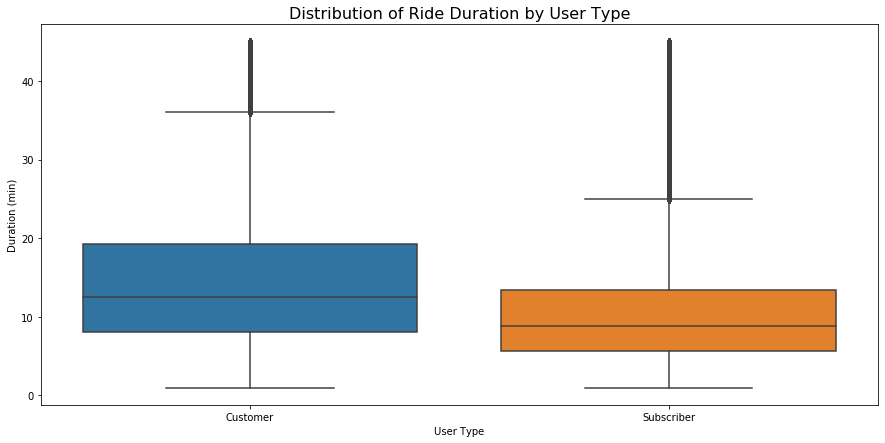

In [94]:
plt.figure(figsize=(15,7))
sb.boxplot(data=df_duration_45mins, x='user_type', y='duration_min')
plt.xlabel('User Type')
plt.ylabel('Duration (min)')
plt.title('Distribution of Ride Duration by User Type', fontsize=16);

Customer have a higher median of duration than subscriber. The violinplot reveals subscriber have a higher frequency of rides less than 10 minutes compared to customers.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
Ride duration differs based on month, whether it is a weekend or weekday and user type. 
- Rides are shorter during the colder months (Nov-Feb) than in hotter months. 
- Users enjoy longer rides in the weekends than weekdays. 
- Customers have a longer ride than subscribers. 

<a id="multivariate"></a>
### Multivariate Exploration
> In this section, we will create plots of three or more variables to investigate the data even further.

#### 1. How does the number of rides differ between user type for each month?

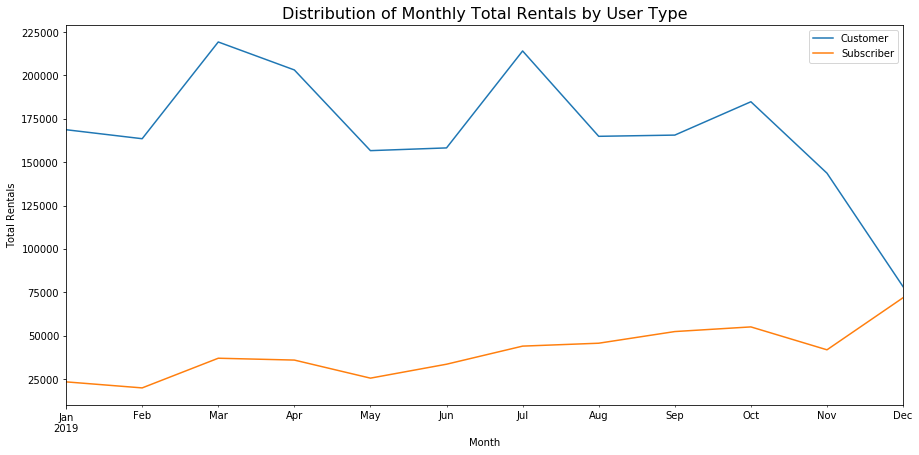

In [53]:
# Count frequency for each user type
# Set index to ensure months are sorted correctly
subscriber_rides = df_clean.query('user_type=="Subscriber"').set_index('start_time').resample('M')['duration_min'].count()
customer_rides = df_clean.query('user_type=="Customer"').set_index('start_time').resample('M')['duration_min'].count()

plt.figure(figsize=(15,7))
subscriber_rides.plot()
customer_rides.plot()
plt.xlabel('Month')
plt.ylabel('Total Rentals')
plt.title('Distribution of Monthly Total Rentals by User Type', fontsize=16)
plt.legend(['Customer', 'Subscriber']);

Customers have an interesting upwards and downwards trend and finally had a sharp drop in December. Subscribers have an good rising trend from May-October with a slight drop in November but quickly increased in December. One theory that explain the December pattern is that some customers may have started to become a subscriber.

#### 2. Does the monthly ride duration differ by user type?

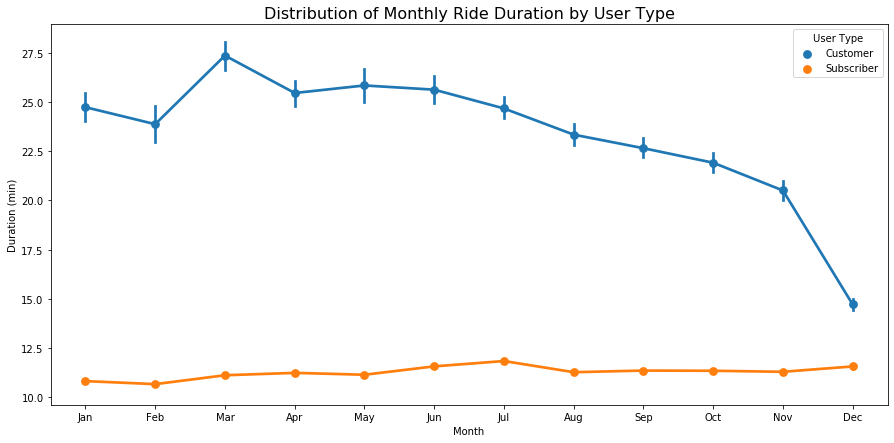

In [55]:
plt.figure(figsize=(15,7))
sb.pointplot(data=df_clean, x='month', y='duration_min', hue='user_type', linestyles='-')
plt.xlabel('Month')
plt.ylabel('Duration (min)')
plt.title('Distribution of Monthly Ride Duration by User Type', fontsize=16)
plt.legend(title='User Type');

Subscribers have a slight increase in ride duration in July probably due to the introduction of ebikes which could have attracted them. The second half of the year has seen a sharp decrease in ride duration for customers and a slow growth for subscribers.

#### 3. What is the daily ride duration between user type?

C:\Users\Suva\Anaconda3\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


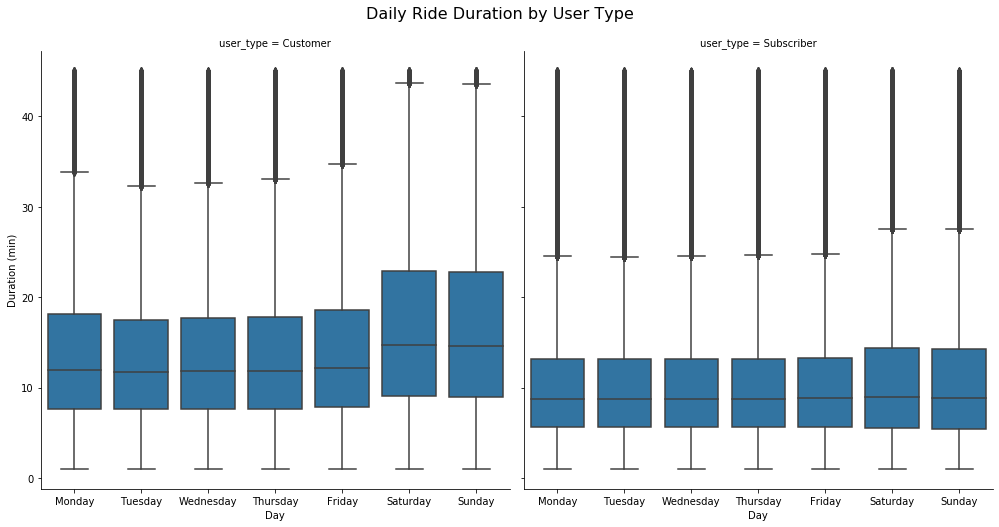

In [60]:
g = sb.FacetGrid(data=df_duration_45mins, col='user_type', height=7)
g.map(sb.boxplot, 'day', 'duration_min');
plt.suptitle("Daily Ride Duration by User Type", y=1.04, fontsize=16)
g.set_axis_labels('Day', 'Duration (min)');

Customers have a longer ride duration than subscribers on a daily basis. Bay Wheels can create marketing strategy to attract these customers to become a subscriber.

In [20]:
# Save the cleaned data
df_clean.to_csv('baywheels_exploration.csv', index=False)

In [21]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2506982 entries, 0 to 2506982
Data columns (total 18 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         object        
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           object        
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  int64         
 12  user_type                category      
 13  month                    object        
 14  hour                     int64         
 15  day                      category      
 16  duration_min             float64       
 17  duration_period          ca

<a id="conclusion"></a>
### Conclusion

The year 2019 has an interesting trend as the rebranding done by Lyft affected the growth in number of rentals.

**1. Most rides are during working hours** <br>
Higher rentals during weekdays and at 8-9am and 5-6pm.

**2. Most rides have short duration** <br>
76% of rides are less than 15 minutes, 20% are between 15-30 minutes and only 5% are more than 30 minutes.

**3. Rentals and ride duration affected by season** <br>
More rentals and longer ride duration during hotter months. However, the number of rental was affected by the rebranding and marketing strategy by Lyft. For example, the drop in May-June was due to the rebranding, July had higher rentals due to the introduction of ebike but dropped again in August when ebikes were pulled out due to battery issues.

**4. High number of subscribers but customers have longer ride duration** <br>
80.6% are subscribers but customers have longer ride duration (median 12.5 mins) than subscribers (median 8.8 mins) for rides less than 45 minutes.

**5. Customers might be transitioning to subscribers** <br>
Customers have an unstable trend but had a sharp decrease in December while number of subscribers have increased in that month. This may be due to customers are becoming subscribers.
